<a href="https://colab.research.google.com/github/zahoororakzai11/machine-learning/blob/main/Logistic_Regression%2C_Multiple_Logistic_Regression%2C_and_KNN_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this section we will be covering Linear Regression, KNN-Classification, and Logistic Regression on the famous iris dataset.

Specifically, we will:

Import data and data exploration.
Fit a linear regression model for classification, understand drawbacks, and interpret results.
Fit a simple logistic regression model for classification, compare performance, and interpret results.
Visualize Predictions and Decision boundaries.
Fit a higher order polynomial logistic regression model for classification, compare performance, plot decision boundaries, and interpret results.
Fit a higher order polynomial logistic regression model for classification with different regularization parameters C ( [10000, 100, 1] )
Optional: Fit a KNN-classification model for classification, plot decision boundaries, and interpret results.
Optional Homework Tip: Pipeline building to sequentially apply a list of transforms (e.g. scaling, polynomial feature creation) and a final estimator.

In [1]:

# Data and Stats packages
import numpy as np
import pandas as pd

import statsmodels.api as sm
from statsmodels.api import OLS
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Visualization packages
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Aesthetic settings
from IPython.display import display
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)
import warnings
warnings.filterwarnings("ignore")

1. # Import data and data exploration

In [2]:
dataset = datasets.load_iris()
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
# What our the target and features?
print(dataset.target_names)
print(dataset.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
X = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
y = pd.DataFrame(data=dataset.target, columns=['species'])
print(X.shape)
print(y.shape)

(150, 4)
(150, 1)


In [6]:
display(X.head())
display(X.describe())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
display(y.head())
display(y.describe())

,species
0,0
1,0
2,0
3,0
4,0


,species
count,150.000000
mean,1.000000
std,0.819232
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,2.000000


## Explore Data

In [8]:
full_df = pd.concat([X,y], axis=1)
full_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


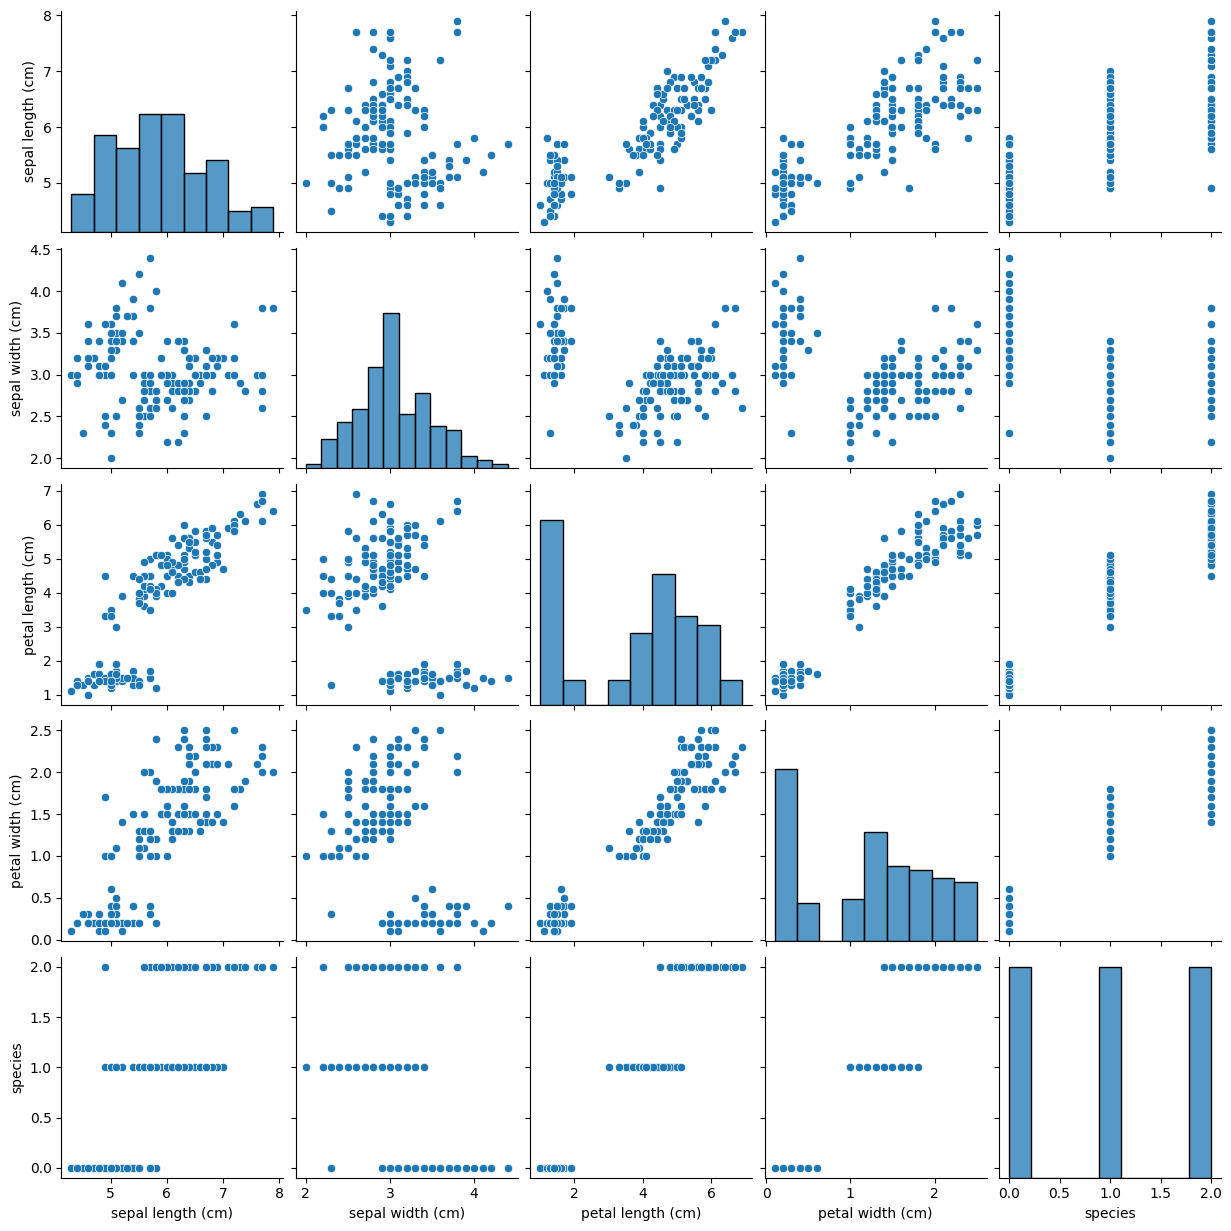

In [9]:
sns.pairplot(full_df)
plt.show()

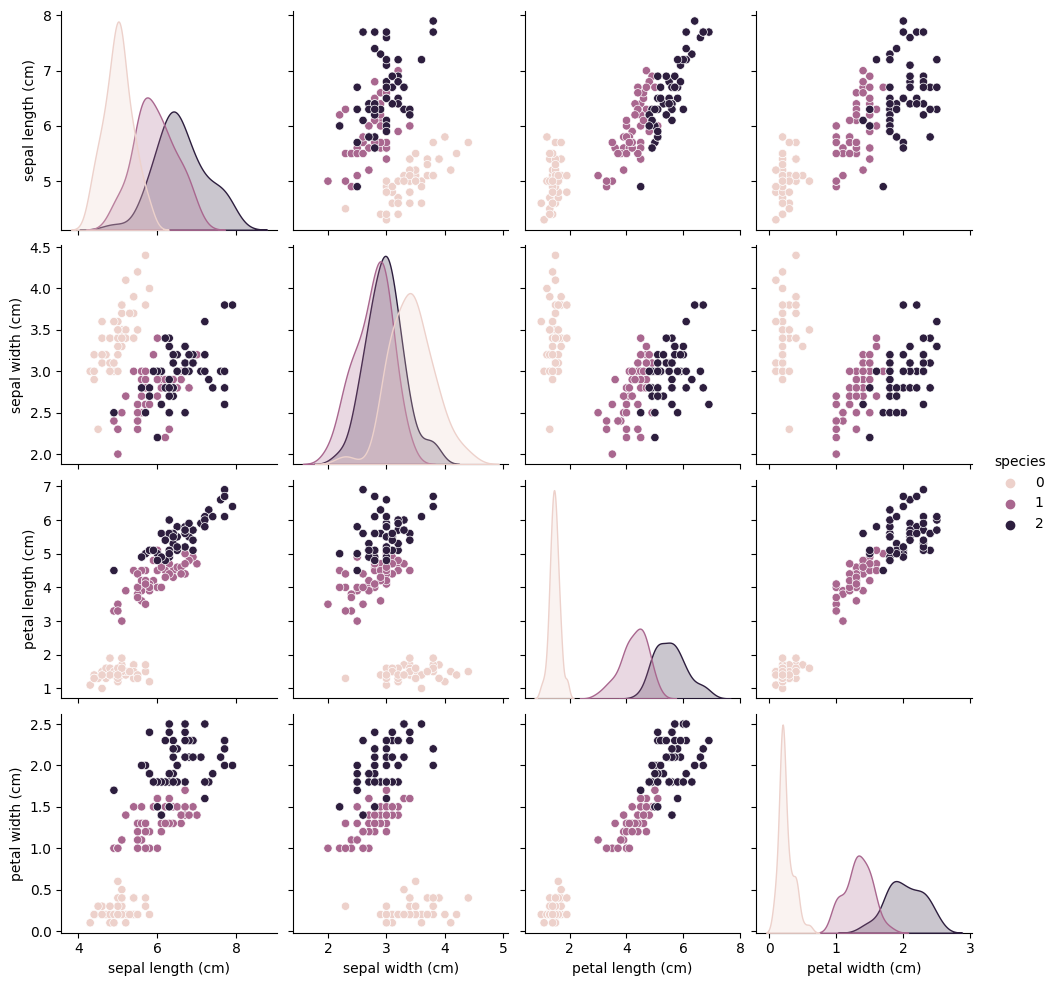

In [10]:
sns.pairplot(full_df, hue='species')
plt.show()

In [11]:
X = X[['sepal width (cm)', 'sepal length (cm)']]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(100, 2)
(100, 1)
(50, 2)
(50, 1)


In [18]:
np.round(y_pred_train[:5])
np.round(y_pred_train[:5]).astype(int)
model_linear_sklearn = LinearRegression()

#Add constant to x_train and x_test
X_train_cst = sm.add_constant(X_train)
X_test_cst = sm.add_constant(X_test)

#Training
model_linear_sklearn.fit(X_train_cst, y_train)

#Predict
y_pred_train = np.round(model_linear_sklearn.predict(X_train_cst)).astype(int)
y_pred_test = np.round(model_linear_sklearn.predict(X_test_cst)).astype(int)

#Performance Evaluation
train_score = accuracy_score(y_train, y_pred_train)*100
test_score = accuracy_score(y_test, y_pred_test)*100

print("Training Set Accuracy:",str(train_score)+'%')
print("Testing Set Accuracy:",str(test_score)+'%')

Training Set Accuracy: 73.0%
Testing Set Accuracy: 80.0%


In [19]:
confusion_matrix_linear = pd.crosstab(  y_test.values.flatten(),
                                        y_pred_test.flatten(),
                                        rownames=['Actual Class'],
                                        colnames=['Predicted Class'])
display(confusion_matrix_linear)

Predicted Class,0,1,2,3
Actual Class,,,,
0,19,0,0,0
1,0,10,5,0
2,0,4,11,1


In [20]:
#Training
model_logistic = LogisticRegression(C=100).fit(X_train_cst, y_train)

#Predict
y_pred_train = model_logistic.predict(X_train_cst)
y_pred_test = model_logistic.predict(X_test_cst)

#Performance Evaluation
train_score = accuracy_score(y_train, y_pred_train)*100
test_score = accuracy_score(y_test, y_pred_test)*100

print("Training Set Accuracy:",str(train_score)+'%')
print("Testing Set Accuracy:",str(test_score)+'%')

Training Set Accuracy: 82.0%
Testing Set Accuracy: 80.0%


## Let's compare logistic regression against linear regression predictions

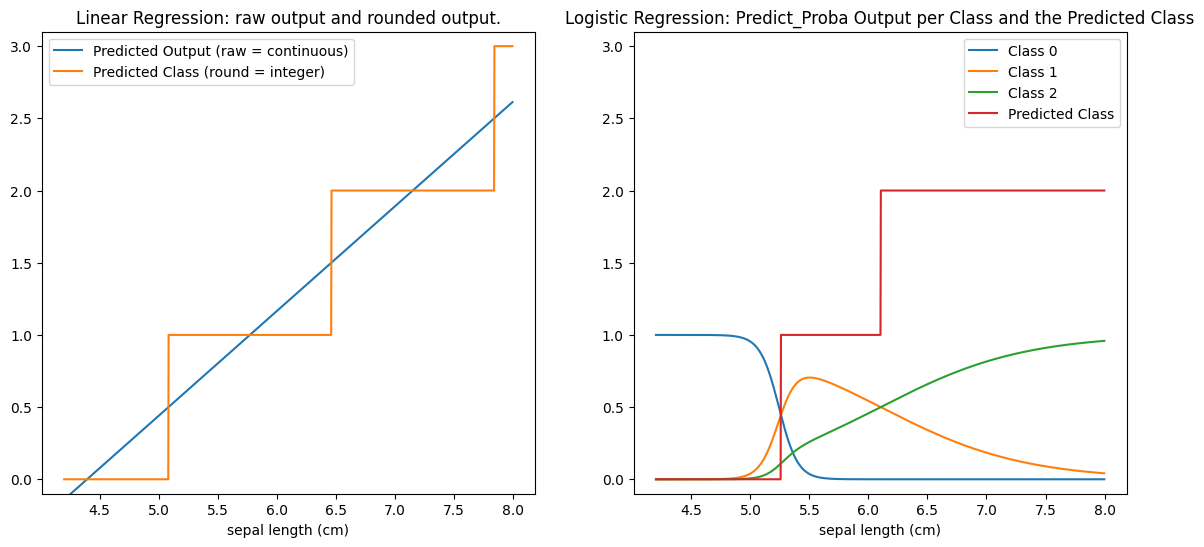

In [21]:
# Making our input features (x_2 varying, x_1 constat = mean of x_1)
x_1 = X_train['sepal width (cm)']
x_2 = X_train['sepal length (cm)']

x_2_min, x_2_max = x_2.min()-0.1, x_2.max()+0.3

x_2_range  = np.arange(x_2_min, x_2_max, 0.003)
x_constant = np.ones_like(x_2_range)
x_1_range  = np.ones_like(x_2_range)*x_1.mean()

# Construct our input features
X_with_varying_x_2 = np.stack([x_constant.ravel(),
                               x_1_range.ravel() ,
                               x_2_range.ravel() ], axis = 1)

# Make linear Predictions
prediction_linear = model_linear_sklearn.predict(X_with_varying_x_2)

# Make logistic Predictions
prediction_proba = model_logistic.predict_proba(X_with_varying_x_2)
prediction_thresholded = model_logistic.predict(X_with_varying_x_2)

f,ax = plt.subplots(1,2, figsize=(14,6))
# Plot Linear Predictions
ax[0].plot(x_2_range, prediction_linear, label= 'Predicted Output (raw = continuous)')
ax[0].plot(x_2_range, np.round(prediction_linear), label= 'Predicted Class (round = integer)')
ax[0].legend()
ax[0].set_title('Linear Regression: raw output and rounded output.')
ax[0].set_ylim((-0.1,3.1))
ax[0].set_xlabel('sepal length (cm)')

# Plot Logistic Predictions
ax[1].plot(x_2_range, prediction_proba[:,0], label= 'Class 0')
ax[1].plot(x_2_range, prediction_proba[:,1], label= 'Class 1')
ax[1].plot(x_2_range, prediction_proba[:,2], label= 'Class 2')
ax[1].plot(x_2_range,prediction_thresholded, label= 'Predicted Class')
ax[1].legend()
ax[1].set_title('Logistic Regression: Predict_Proba Output per Class and the Predicted Class')
ax[1].set_xlabel('sepal length (cm)')
ax[1].set_ylim((-0.1,3.1))
plt.show()

In [22]:
confusion_matrix_logistic = pd.crosstab(  y_test.values.flatten(),
                                          y_pred_test.flatten(),
                                          rownames=['Actual Class'],
                                          colnames=['Predicted Class'])
display(confusion_matrix_logistic)

Predicted Class,0,1,2
Actual Class,,,
0,19,0,0
1,0,8,7
2,0,3,13


In [23]:
print('######################################')
print('Confusion Matrix Linear Regression:')
display(confusion_matrix_linear)

print('\n######################################')
print('Confusion Matrix Logistic Regression:')
display(confusion_matrix_logistic)
print('######################################')

######################################
Confusion Matrix Linear Regression:


Predicted Class,0,1,2,3
Actual Class,,,,
0,19,0,0,0
1,0,10,5,0
2,0,4,11,1



######################################
Confusion Matrix Logistic Regression:


Predicted Class,0,1,2
Actual Class,,,
0,19,0,0
1,0,8,7
2,0,3,13


######################################


In [24]:
X_train.head()

,sepal width (cm),sepal length (cm)
96,2.9,5.7
105,3.0,7.6
66,3.0,5.6
0,3.5,5.1
122,2.8,7.7


In [25]:
def plot_points(ax):
    for i, y_class in enumerate(set(y_train.values.flatten())):
        index = (y_train == y_class).values
        ax.scatter(X_train[index]['sepal width (cm)'],
                   X_train[index]['sepal length (cm)'],
                   c=colors[i],
                   s=65,
                   edgecolor='w',
                   label=names[i])

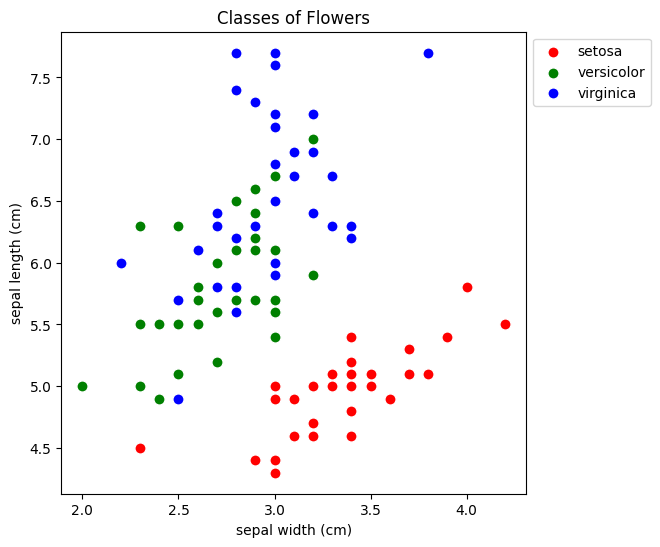

In [26]:
f, ax = plt.subplots(1, 1, figsize=(6,6))

colors = ["red", "green","blue"]
names = dataset.target_names

plot_points(ax)

ax.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
ax.set_title('Classes of Flowers')
ax.set_ylabel('sepal length (cm)')
ax.set_xlabel('sepal width (cm)')
plt.show()

In [27]:
x_1 = X_train['sepal width (cm)']
x_2 = X_train['sepal length (cm)']

# Just for illustration purposes we use a margin of 0.2 to the
# left, right, top and bottum of our minimal and maximal points.
# This way our minimal and maximal points won't lie exactly
# on the axis.

x_1_min, x_1_max = x_1.min() - 0.2, x_1.max() + 0.2
x_2_min, x_2_max = x_2.min() - 0.2, x_2.max() + 0.2

xx_1, xx_2 = np.meshgrid(np.arange(x_1_min, x_1_max, 0.003),
                     np.arange(x_2_min, x_2_max, 0.003))

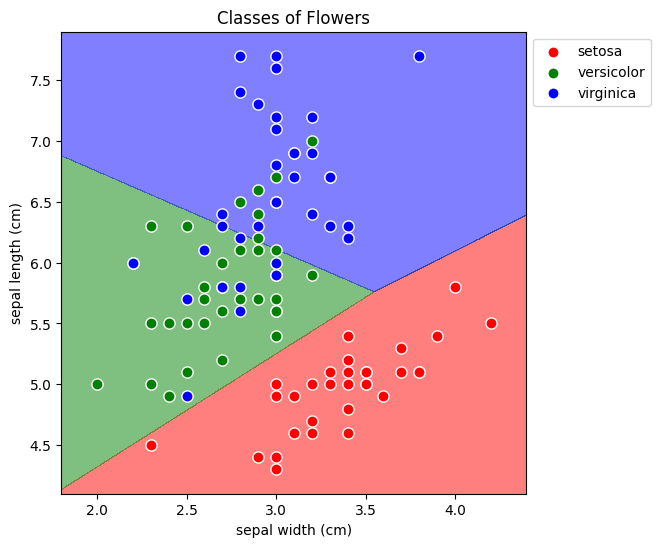

In [28]:
# Plotting decision regions
f, ax = plt.subplots(1, 1, figsize=(6, 6))

X_mesh = sm.add_constant(np.stack((xx_1.ravel(), xx_2.ravel()),axis=1))

Z = model_logistic.predict(X_mesh)
Z = Z.reshape(xx_1.shape)

ax.contourf(xx_1, xx_2, Z, alpha=0.5, colors=colors, levels=2)

plot_points(ax)

ax.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
ax.set_title('Classes of Flowers')
ax.set_ylabel('sepal length (cm)')
ax.set_xlabel('sepal width (cm)')

plt.show()

## 5. Fit a higher order polynomial logistic regression model for classification, compare performance, plot decision boundaries, and interpret results

In [29]:
X_train_cst.head()
X_train_poly_cst=X_train_cst.copy()
X_train_poly_cst['sepal width (cm)^2'] = X_train_cst['sepal width (cm)']**2
X_train_poly_cst['sepal length (cm)^2'] = X_train_cst['sepal length (cm)']**2

X_test_poly_cst=X_test_cst.copy()
X_test_poly_cst['sepal width (cm)^2'] = X_test_poly_cst['sepal width (cm)']**2
X_test_poly_cst['sepal length (cm)^2'] = X_test_poly_cst['sepal length (cm)']**2
X_test_poly_cst.head()

,const,sepal width (cm),sepal length (cm),sepal width (cm)^2,sepal length (cm)^2
73,1.0,2.8,6.1,7.84,37.21
18,1.0,3.8,5.7,14.44,32.49
118,1.0,2.6,7.7,6.76,59.29
78,1.0,2.9,6.0,8.41,36.00
76,1.0,2.8,6.8,7.84,46.24


In [30]:
#Training
model_logistic_poly = LogisticRegression(C=10000).fit(X_train_poly_cst, y_train)

#Predict
y_pred_train = model_logistic_poly.predict(X_train_poly_cst)
y_pred_test = model_logistic_poly.predict(X_test_poly_cst)

#Performance Evaluation
train_score = accuracy_score(y_train, y_pred_train)*100
test_score = accuracy_score(y_test, y_pred_test)*100

print("Training Set Accuracy:",str(train_score)+'%')
print("Testing Set Accuracy:",str(test_score)+'%')

Training Set Accuracy: 82.0%
Testing Set Accuracy: 78.0%


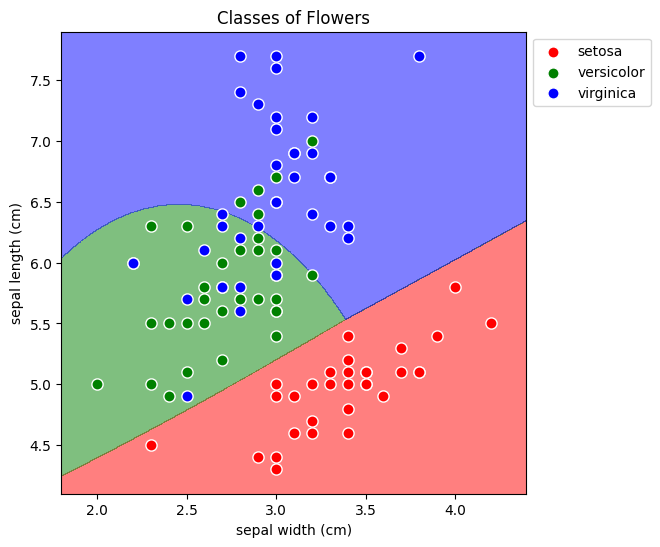

In [31]:
# Plotting decision regions
f, ax = plt.subplots(1, 1, figsize=(6, 6))

X_mesh_poly = sm.add_constant(np.stack((xx_1.ravel(), xx_2.ravel(), xx_1.ravel()**2,xx_2.ravel()**2),axis=1))

Z = model_logistic_poly.predict(X_mesh_poly)
Z = Z.reshape(xx_1.shape)

ax.contourf(xx_1, xx_2, Z, alpha=0.5, colors=colors, levels=2)

plot_points(ax)

ax.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
ax.set_title('Classes of Flowers')
ax.set_ylabel('sepal length (cm)')
ax.set_xlabel('sepal width (cm)')

plt.show()


## 6. Fit a higher order polynomial logistic regression model for classification with different regularization parameters C ( [10000, 100, 1] )

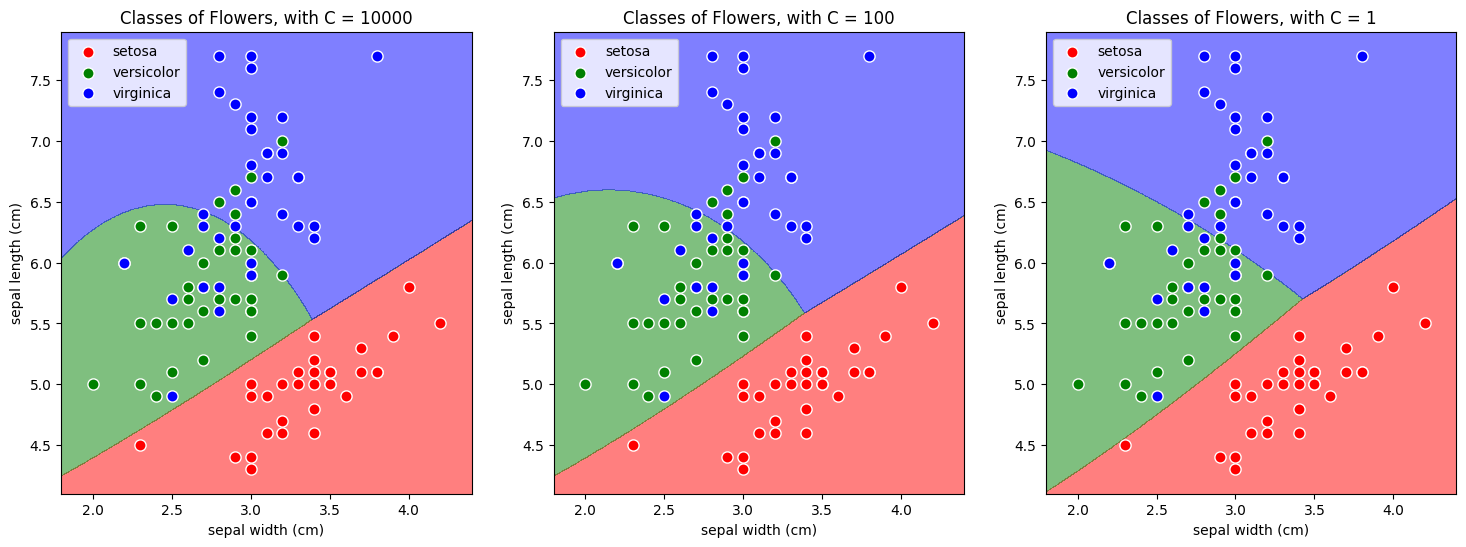

In [32]:
f, ax = plt.subplots(1, 3, figsize=(6*3, 6))

model_logistics =[]
model_logistics_test_accs_scores =[]
model_logistics_train_accs_scores =[]

for test, C in enumerate([10000, 100, 1]):
    model_logistics.append(LogisticRegression(C=C).fit(X_train_poly_cst, y_train))

    y_pred_train = model_logistics[test].predict(X_train_poly_cst)
    y_pred_test = model_logistics[test].predict(X_test_poly_cst)
    model_logistics_train_accs_scores.append(accuracy_score(y_train, y_pred_train)*100)
    model_logistics_test_accs_scores.append(accuracy_score(y_test, y_pred_test)*100)

    Z = model_logistics[test].predict(X_mesh_poly)
    Z = Z.reshape(xx_1.shape)

    ax[test].contourf(xx_1, xx_2, Z, alpha=0.5, colors=colors, levels=2)
    plot_points(ax[test])

    ax[test].legend(loc='upper left', ncol=1)
    ax[test].set_title('Classes of Flowers, with C = '+ str(C))
    ax[test].set_ylabel('sepal length (cm)')
    ax[test].set_xlabel('sepal width (cm)')

plt.show()


In [33]:
model_logistics
for test, model in enumerate(model_logistics):
    print('\nRegularization parameter : \tC = {}'.format(model.C))
    print("Training Set Accuracy : \t{}".format(model_logistics_train_accs_scores[test])+'%')
    print("Testing Set Accuracy : \t\t{}".format(model_logistics_test_accs_scores[test])+'%')
    print('Mean absolute coeficient : \t{:0.2f}'.format(np.mean(np.abs(model.coef_))))



Regularization parameter : 	C = 10000
Training Set Accuracy : 	82.0%
Testing Set Accuracy : 		78.0%
Mean absolute coeficient : 	4.83

Regularization parameter : 	C = 100
Training Set Accuracy : 	82.0%
Testing Set Accuracy : 		78.0%
Mean absolute coeficient : 	1.77

Regularization parameter : 	C = 1
Training Set Accuracy : 	82.0%
Testing Set Accuracy : 		80.0%
Mean absolute coeficient : 	0.32


##  Fit a KNN-classification model for classification, plot decision boundaries, and interpret results.

In [34]:
#Training
model_KNN_classifier = KNeighborsClassifier(n_neighbors=1).fit(X_train_cst, y_train)
#Predict
y_pred_train = model_KNN_classifier.predict(X_train_cst)
y_pred_test = model_KNN_classifier.predict(X_test_cst)

#Performance Evaluation
train_score = accuracy_score(y_train, y_pred_train)*100
test_score = accuracy_score(y_test, y_pred_test)*100

print("Training Set Accuracy:",str(train_score)+'%')
print("Testing Set Accuracy:",str(test_score)+'%')


Training Set Accuracy: 96.0%
Testing Set Accuracy: 70.0%


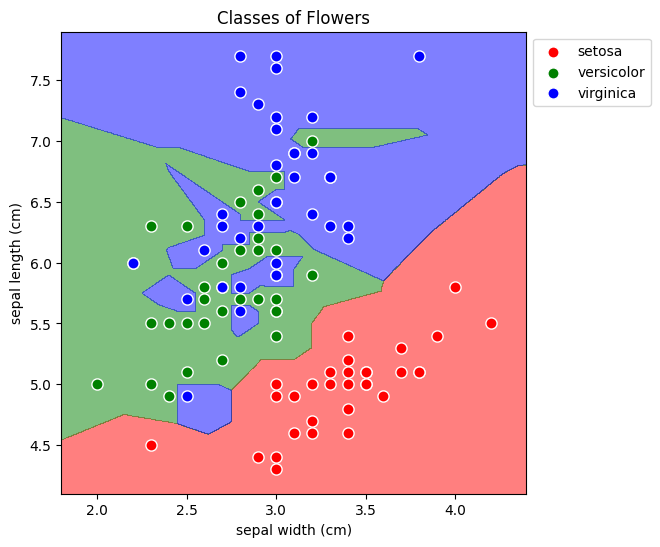

In [35]:
# Plotting decision regions
f, ax = plt.subplots(1, 1, figsize=(6, 6))

Z = model_KNN_classifier.predict(X_mesh)
Z = Z.reshape(xx_1.shape)

ax.contourf(xx_1, xx_2, Z, alpha=0.5, colors=colors, levels=2)

plot_points(ax)

ax.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
ax.set_title('Classes of Flowers')
ax.set_ylabel('sepal length (cm)')
ax.set_xlabel('sepal width (cm)')
plt.show()